In [1]:
import pandas as pd


In [2]:
# Reading the dataframes
df_Content = pd.read_csv("Content.csv")
df_Reactions = pd.read_csv("Reactions.csv")
df_ReactionsTypes = pd.read_csv("ReactionTypes.csv")

# Exploring the data

In [3]:
# df_Content.sample(5)
# df_Content.dtypes
df_Content.shape

(1000, 6)

In [4]:
df_Reactions.sample(5)
df_Reactions.dtypes
df_Reactions.shape

(25553, 5)

In [5]:
df_ReactionsTypes.sample(5)
df_ReactionsTypes.shape

(16, 4)

# Cheking the missing values

In [6]:
df_Content.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [7]:
df_Reactions.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [8]:
df_ReactionsTypes.isna().sum()

Unnamed: 0    0
Type          0
Sentiment     0
Score         0
dtype: int64

# Changing the data type of some values within a column, and removing columns which are not relevant to this task.

In [9]:
#Removing columns
df_Content_final=df_Content[["Content ID","Type","Category"]]
df_Reactions_final=df_Reactions[["Content ID" ,"Type","Datetime"]]
df_ReactionsTypes_final=df_ReactionsTypes[["Type","Sentiment","Score"]]

In [10]:
#Removing rows that have values which are missing
df_Content_cleaned=df_Content_final.dropna()
df_Reactions_cleaned=df_Reactions_final.dropna()
df_ReactionsTypes_cleaned=df_ReactionsTypes_final.dropna()

In [11]:
#Checking the structure
# df_Content_cleaned.shape
# df_Reactions_cleaned.shape
# df_ReactionsTypes_cleaned.shape

In [12]:
#Checking the dtypes
# df_Content_cleaned.dtypes
# df_Reactions_cleaned.dtypes
# df_ReactionsTypes_cleaned.dtypes

In [13]:
def has_quoted_values(df):
    """
    Check if a DataFrame has values surrounded by single quotes.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - True if there are values surrounded by single quotes, False otherwise.
    """
    check_condition = lambda x: isinstance(x, str) and x.startswith("'") and x.endswith("'")
    return df.applymap(check_condition).any().any()

# Example usage:
result = has_quoted_values(df_Content_cleaned)

if result:
    print("The dataset has values surrounded by single quotes.")
else:
    print("The dataset does not have values surrounded by single quotes.")


The dataset does not have values surrounded by single quotes.


In [14]:
result = has_quoted_values(df_Content_cleaned)

if result:
    print("The dataset has values surrounded by single quotes.")
else:
    print("The dataset does not have values surrounded by single quotes.")


The dataset does not have values surrounded by single quotes.


In [15]:
result = has_quoted_values(df_Reactions_cleaned)

if result:
    print("The dataset has values surrounded by single quotes.")
else:
    print("The dataset does not have values surrounded by single quotes.")

The dataset does not have values surrounded by single quotes.


In [16]:
result = has_quoted_values(df_ReactionsTypes_cleaned)

if result:
    print("The dataset has values surrounded by single quotes.")
else:
    print("The dataset does not have values surrounded by single quotes.")

The dataset does not have values surrounded by single quotes.


# Duplicate values

In [17]:
has_duplicates_content = df_Content_cleaned.duplicated().any()
has_duplicates_Reactions = df_Reactions_cleaned.duplicated().any()
has_duplicates_ReactionsTypes = df_ReactionsTypes_cleaned.duplicated().any()


In [18]:
has_duplicates_content

False

In [19]:
has_duplicates_Reactions

False

In [20]:
has_duplicates_ReactionsTypes

False

# Joining

In [21]:
df_ReactionsTypes

,Unnamed: 0,Type,Sentiment,Score
0,0,heart,positive,60
1,1,want,positive,70
2,2,disgust,negative,0
3,3,hate,negative,5
4,4,interested,positive,30
5,5,indifferent,neutral,20
6,6,love,positive,65
7,7,super love,positive,75
8,8,cherish,positive,70
9,9,adore,positive,72


In [22]:
#Transform the dataset to merge with Reactions Types
merged1=df_Reactions_cleaned.merge(df_Content_cleaned,on="Content ID", how="outer")
merged1.isna().sum()
prefinal_merge=merged1.dropna()
prefinal_merge = prefinal_merge.rename(columns={'Type_y': 'Type_content'})
prefinal_merge = prefinal_merge.rename(columns={'Type_x': 'Type'})
prefinal_merge

,Content ID,Type,Datetime,Type_content,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,Studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,Studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,Studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,Studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,Studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [23]:
merged2=prefinal_merge.merge(df_ReactionsTypes_cleaned,on="Type", how="outer")
merged2.dtypes

Content ID      object
Type            object
Datetime        object
Type_content    object
Category        object
Sentiment       object
Score            int64
dtype: object

In [24]:
merged2['Datetime'] = pd.to_datetime(merged2['Datetime'])
merged2.dtypes

Content ID              object
Type                    object
Datetime        datetime64[ns]
Type_content            object
Category                object
Sentiment               object
Score                    int64
dtype: object

In [25]:
final_df=merged2
final_df['Category'] = final_df['Category'].str.strip('"')
# Assuming final_df is your original DataFrame
final_df['Category'] = final_df['Category'].replace({'Food':'food','Technology':'technology','Fitness':'fitness','Science':'science','Animals':'animals','Soccer':'soccer','Studying':'studying','Culture':'culture','Education':'education','Public Speaking':'public speaking','Travel':'travel','Veganism':'veganism','Healthy Eating':'healthy eating'})   
final_df

,Content ID,Type,Datetime,Type_content,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


In [26]:
# Assuming final_df is your DataFrame
category_counts = final_df['Category'].value_counts()
sorted_category_counts = category_counts.sort_values(ascending=False)
sorted_category_counts

animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: Category, dtype: int64

In [27]:
# Assuming final_df is your DataFrame
# Assuming final_df is your DataFrame
top_5_categories_df = final_df['Category'].value_counts().nlargest(5).reset_index(name='Count')
top_5_categories_df

,index,Count
0,animals,1897
1,science,1796
2,healthy eating,1717
3,food,1699
4,technology,1698


In [33]:
# Create a Pandas Excel writer using ExcelWriter
with pd.ExcelWriter('output.xlsx') as writer:
    # Write each DataFrame to a specific sheet
    top_5_categories_df.to_excel(writer, sheet_name='Categories', index=False)
    final_df.to_excel(writer, sheet_name='CleanedData', index=False)

In [34]:
# Assuming final_df is your original DataFrame
type_category_counts = final_df.pivot_table(index='Category', columns='Type', aggfunc='count', fill_value=0)
# Display the resulting DataFrame
type_category_counts.to_excel('category_reaction.xlsx')




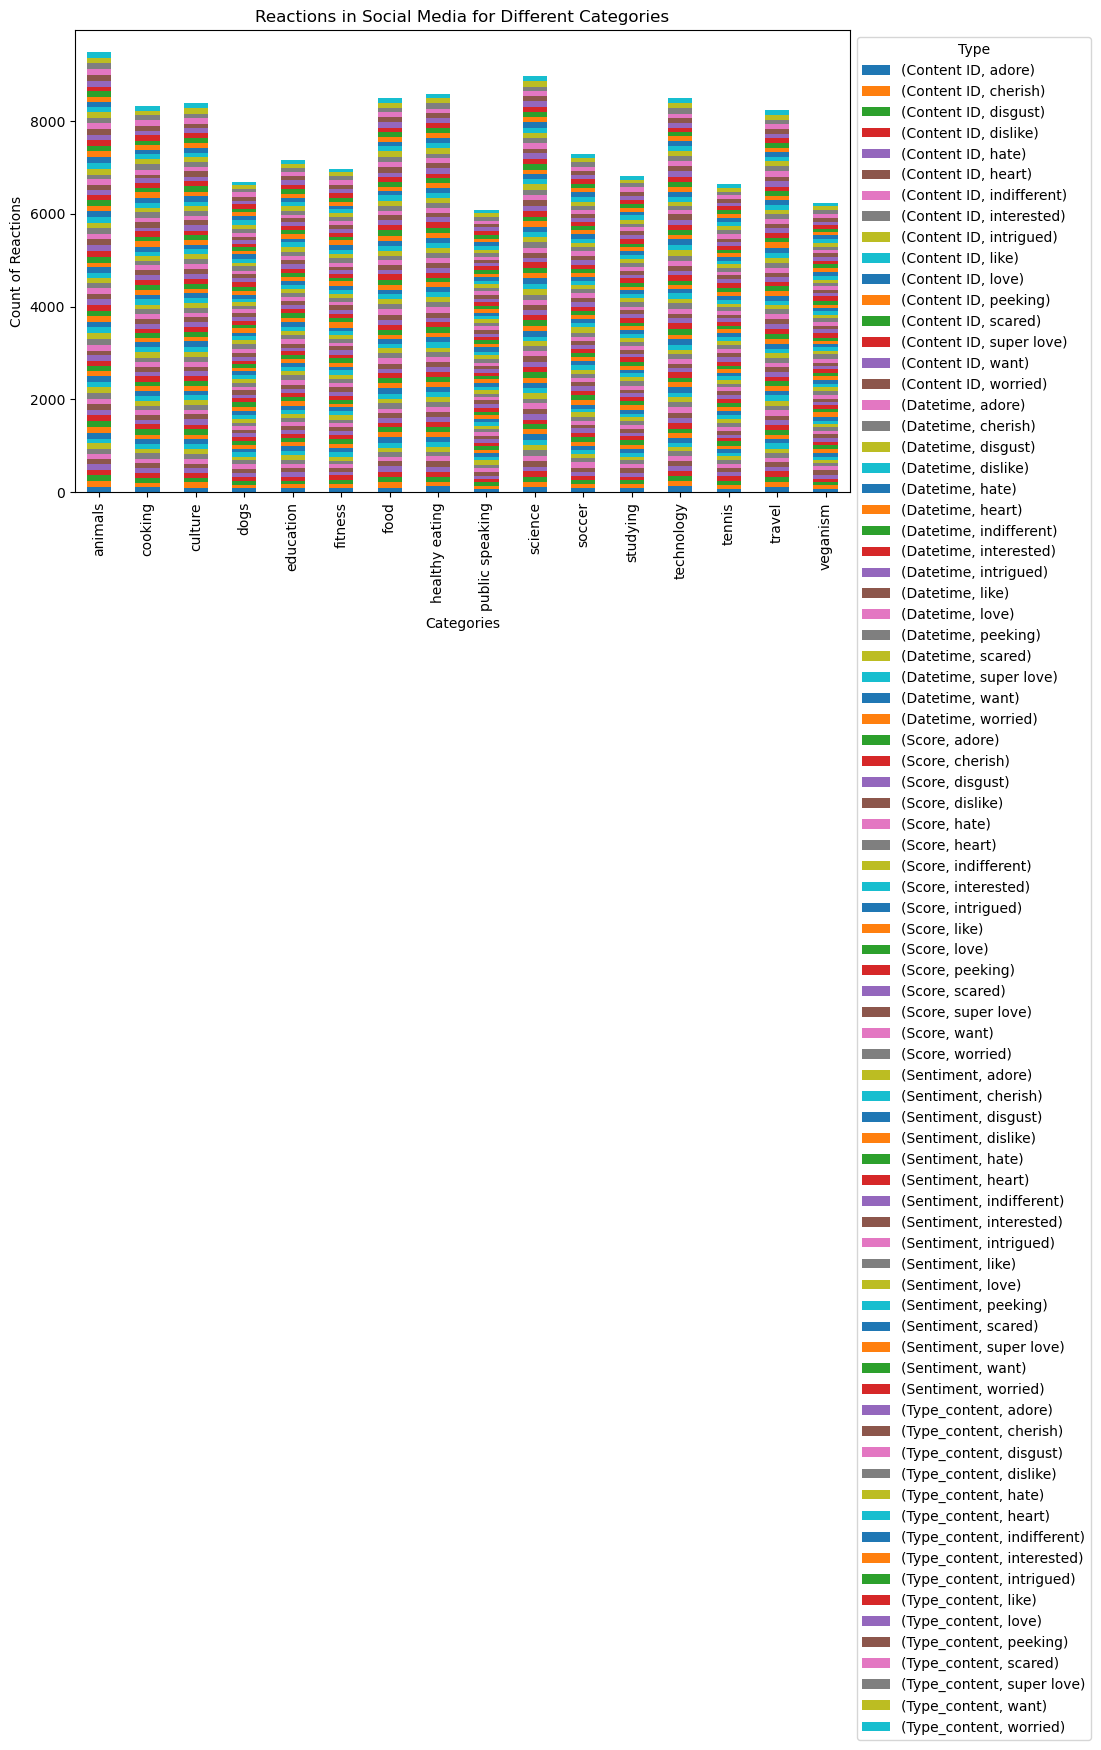

In [35]:
# Plotting
type_category_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Reactions in Social Media for Different Categories')
plt.xlabel('Categories')
plt.ylabel('Count of Reactions')
plt.legend(title='Type', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


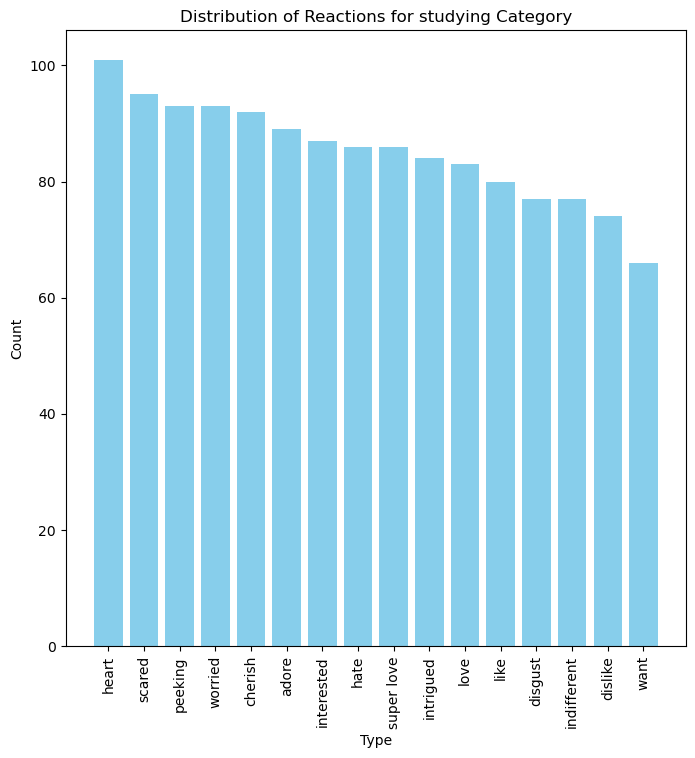

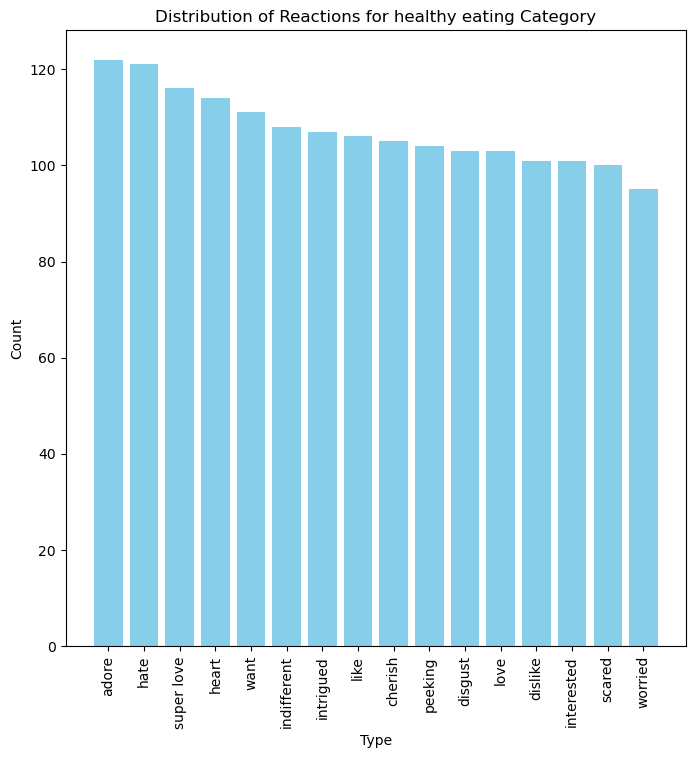

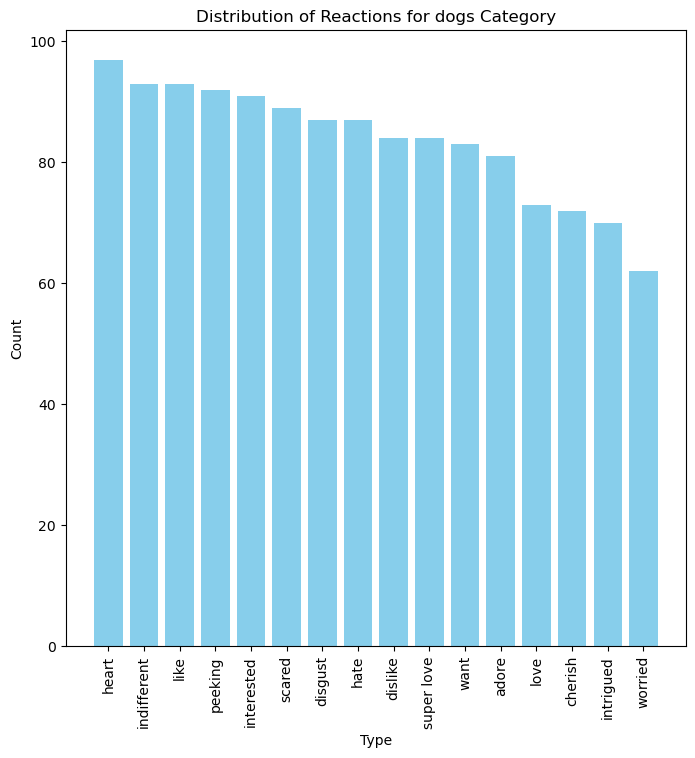

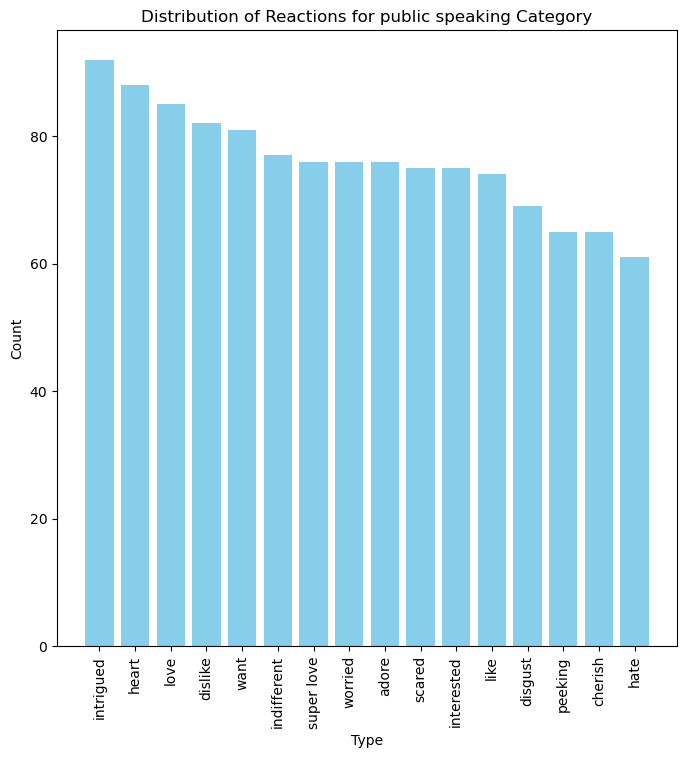

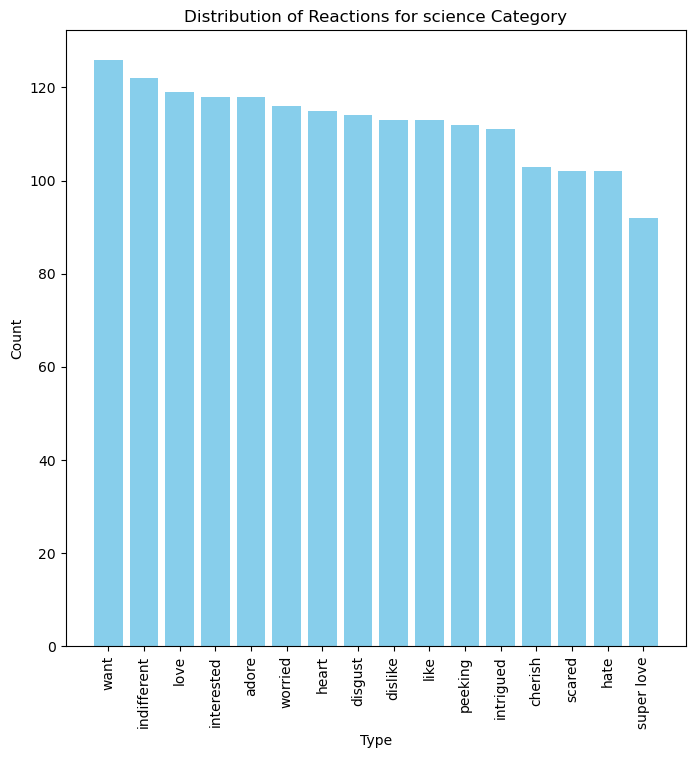

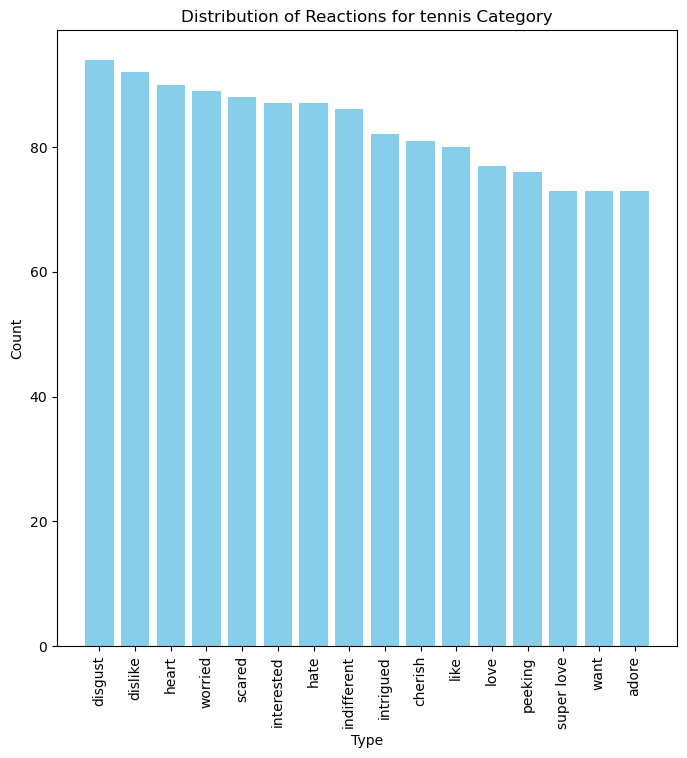

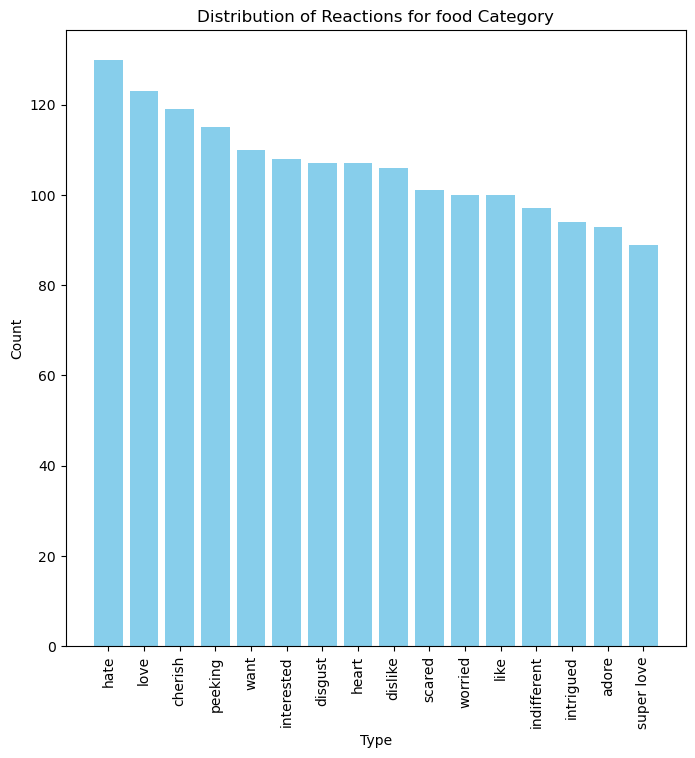

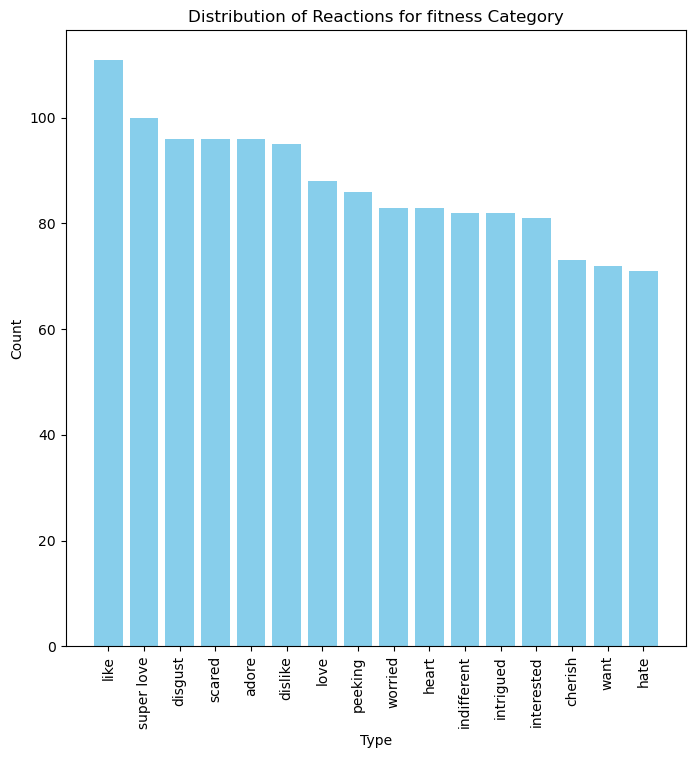

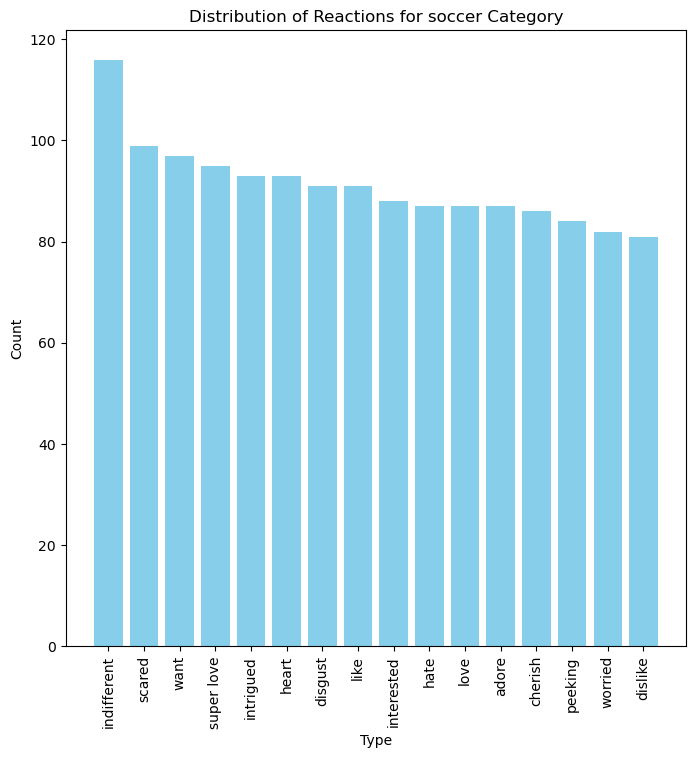

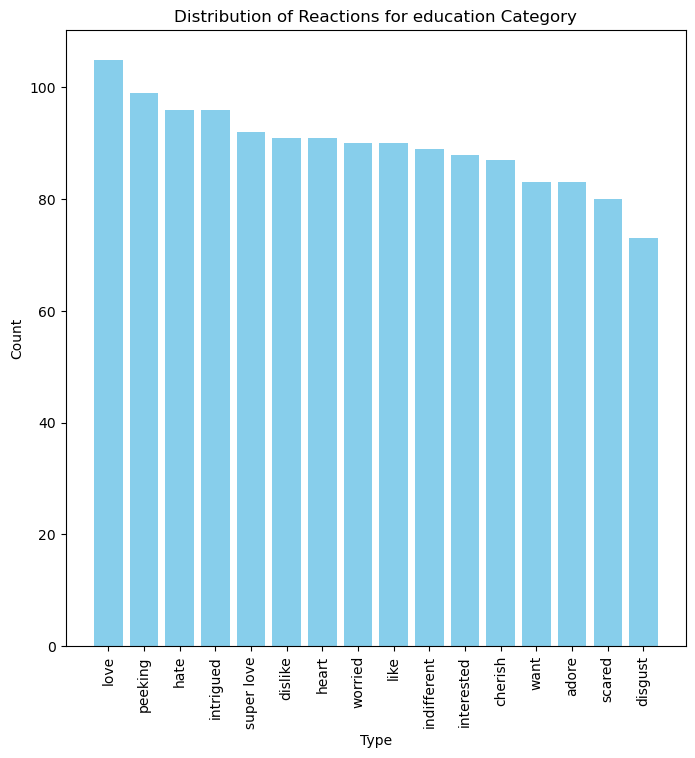

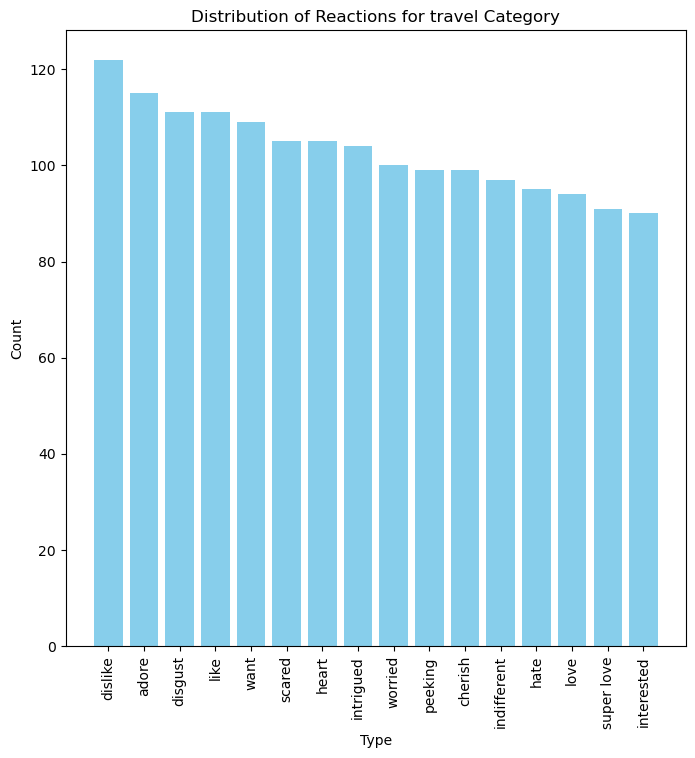

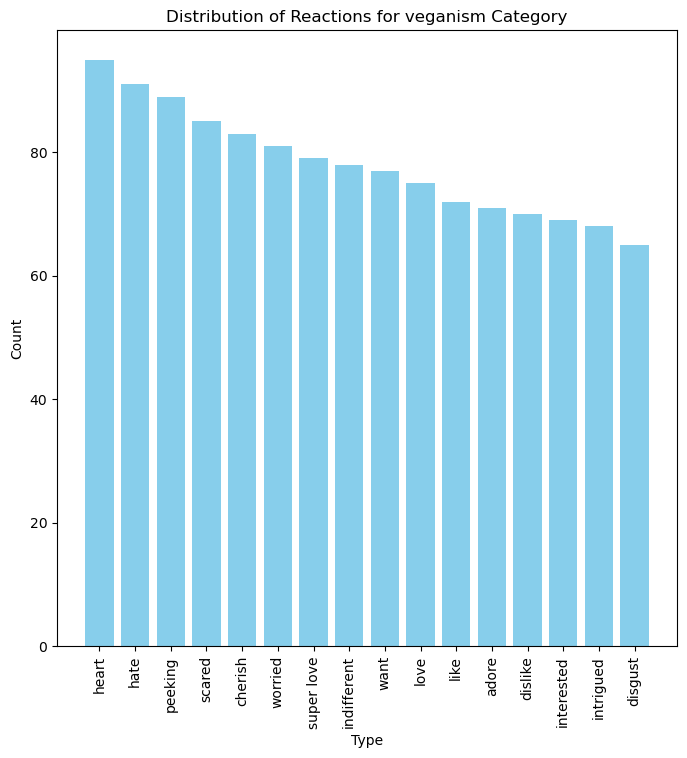

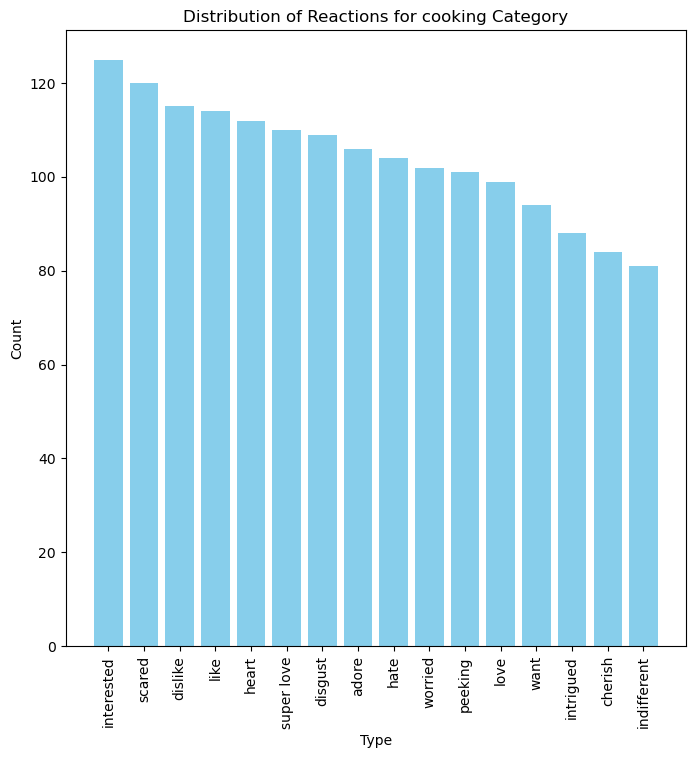

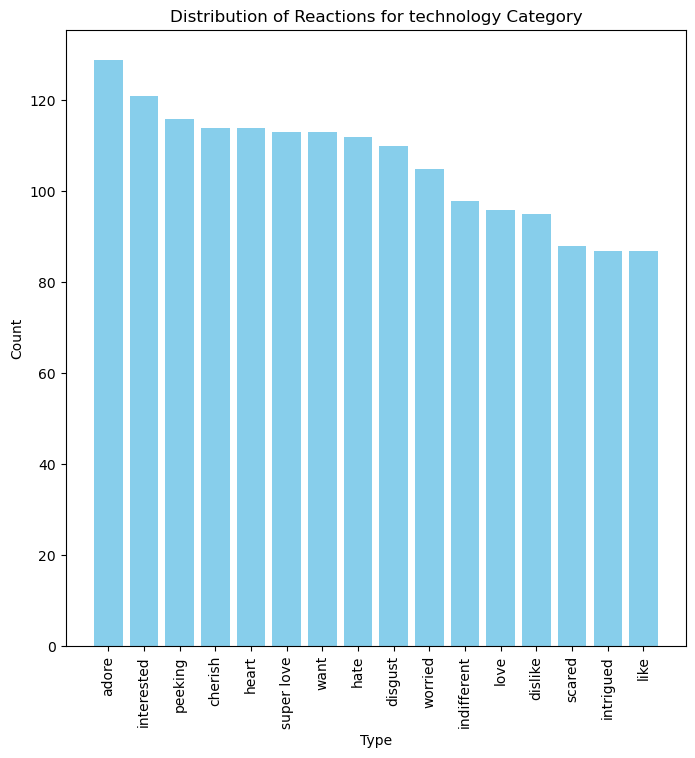

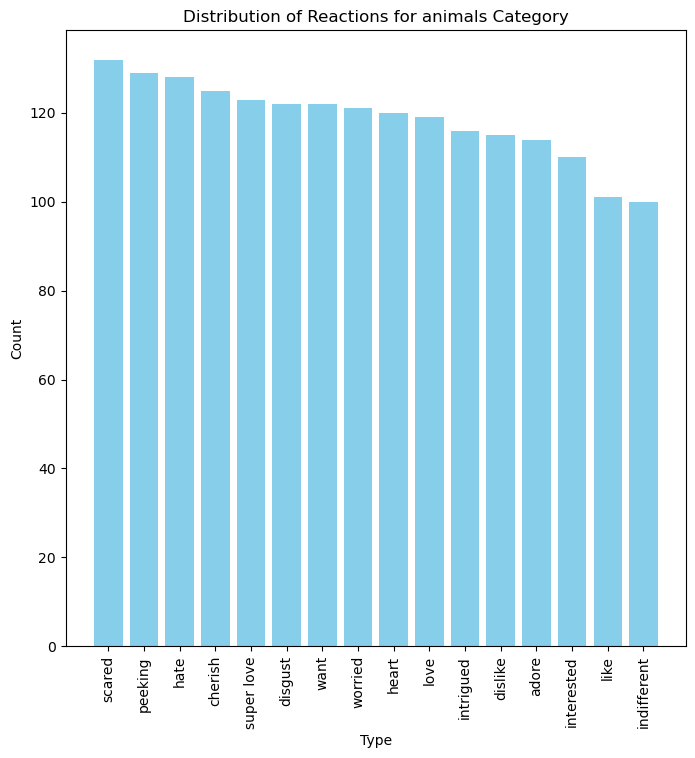

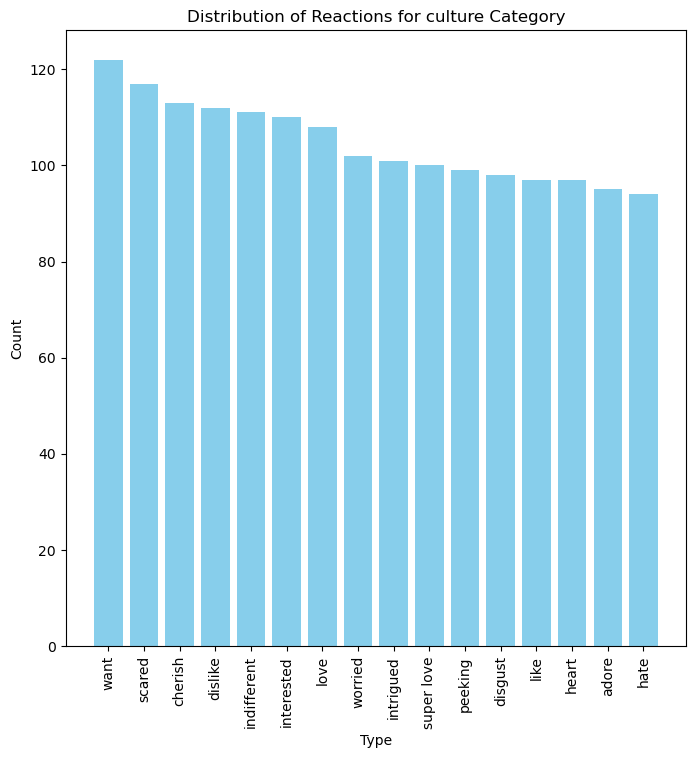

In [53]:
# Assuming final_df is your original DataFrame
categories = final_df['Category'].unique()

for category in categories:
    category_data = final_df[final_df['Category'] == category]
    type_counts = category_data['Type'].value_counts()

    # Plotting a vertical bar chart with rotated x-axis labels
    plt.figure(figsize=(8, 8))
    bars = plt.bar(type_counts.index, type_counts, color='skyblue')

    # Rotate x-axis labels vertically and place them inside the bars
    plt.xticks(rotation='vertical', ha='center')
    plt.xlabel('Type')
    plt.ylabel('Count')
    plt.title(f'Distribution of Reactions for {category} Category')
    
    plt.show()  # Display the plot for each category


In [41]:
# Extract the month from the datetime column
final_df['Month'] = final_df['Datetime'].dt.month

# Count the occurrences of each month
monthly_counts = final_df['Month'].value_counts()

# Find the most repetitive month
most_repetitive_month = monthly_counts.idxmax()
monthly_counts


5     2138
1     2126
8     2114
12    2092
7     2070
10    2056
11    2034
9     2022
6     2021
3     2012
4     1974
2     1914
Name: Month, dtype: int64

In [37]:
# Extract the year and month from the datetime column
final_df['Year'] = final_df['Datetime'].dt.year
final_df['Month'] = final_df['Datetime'].dt.month

# Count the occurrences of each month within each year
year_month_counts = final_df.groupby(['Year', 'Month']).size().reset_index(name='Count')

# Display the resulting DataFrame
year_month_counts

,Year,Month,Count
0,2020,6,892
1,2020,7,2070
2,2020,8,2114
3,2020,9,2022
4,2020,10,2056
5,2020,11,2034
6,2020,12,2092
7,2021,1,2126
8,2021,2,1914
9,2021,3,2012


In [38]:
# Sort the DataFrame in ascending order by 'Count'
year_month_counts_sorted = year_month_counts.sort_values(by='Count', ascending=False)
year_month_counts_sorted


,Year,Month,Count
11,2021,5,2138
7,2021,1,2126
2,2020,8,2114
6,2020,12,2092
1,2020,7,2070
4,2020,10,2056
5,2020,11,2034
3,2020,9,2022
9,2021,3,2012
10,2021,4,1974


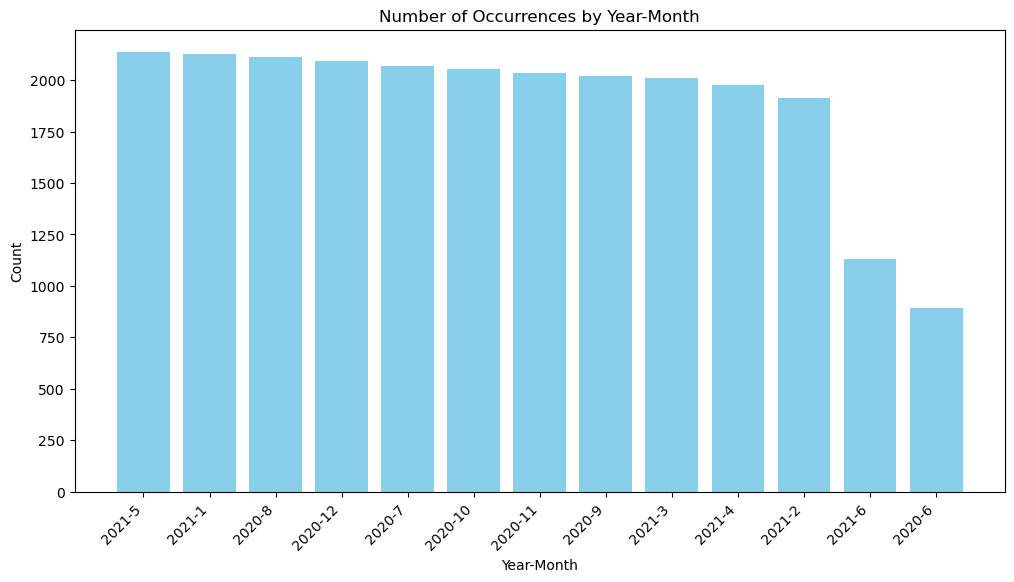

In [39]:

# Assuming year_month_counts_sorted is your sorted DataFrame
plt.figure(figsize=(12, 6))
plt.bar(year_month_counts_sorted['Year'].astype(str) + '-' + year_month_counts_sorted['Month'].astype(str), year_month_counts_sorted['Count'], color='skyblue')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.title('Number of Occurrences by Year-Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()
